In [2]:
from scipy import signal
import numpy as np
import pandas as pd
import tqdm

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import *

In [5]:
def _read_data(data_file, N=np.inf):
    data = []
    with open(data_file, 'r') as f:
        count = 0
        for line in f:
            line = line.strip()
            num = list(map(float, line.split()))
            data.append(num)
            count += 1
            if count >= N:
                break
    return data

def compute_freqs_powers(data):
    freqs, powers = [], []
    for i in tqdm.tqdm(range(len(data))):
        f, p = signal.periodogram(data[i])
        freqs.append(f)
        powers.append(p)
    return freqs, powers


def fp_pipeline(data_file, N=np.inf) -> pd.DataFrame:
    data_list = _read_data(data_file) # Read all data
    data_arr = np.concatenate([np.asarray(d) for d in data_list])
    mean_data = np.mean(data_arr)
    sd_data = np.std(data_arr)

    if N < np.inf:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list[:N]]
    else:
        data_norm = [(np.asarray(d) - mean_data)/sd_data for d in data_list]
    freqs, powers = compute_freqs_powers(data_norm)
    df = pd.DataFrame.from_dict({
        'freq': np.concatenate(freqs),
        'power': np.concatenate(powers)
    })
    return df

In [43]:
# Length Statistics
!wc -l data/webtext.train.jsonl
!wc -l data/webtext.train_opt.jsonl
!wc -l data/webtext.valid.jsonl
!wc -l data/webtext.test.jsonl
!wc -l data/webtext.train.model=.nll
!wc -l data/webtext.train_opt.model=.nll
!wc -l data/webtext.valid.model=.nll
!wc -l data/webtext.test.model=.nll

9310 data/webtext.train.jsonl
5273 data/webtext.train_opt.jsonl
5000 data/webtext.valid.jsonl
5000 data/webtext.test.jsonl
9310 data/webtext.train.model=.nll
5273 data/webtext.train_opt.model=.nll
5000 data/webtext.valid.model=.nll
5000 data/webtext.test.model=.nll


In [30]:
# Estimate the mean and SD of each dataset
data_webtext = _read_data('data/webtext.train.model=.nll')
data_webtext = np.concatenate([np.asarray(d) for d in data_webtext])
mean_webtext = np.mean(data_webtext)
sd_webtext = np.std(data_webtext)
print(mean_webtext, sd_webtext)

2.9757630734385123 2.8415559611603447


In [29]:
data_webtext = _read_data('data/webtext.train_opt.model=.nll')
data_webtext = np.concatenate([np.asarray(d) for d in data_webtext])
mean_webtext = np.mean(data_webtext)
sd_webtext = np.std(data_webtext)
print(mean_webtext, sd_webtext)

3.079109923610435 2.534582560816421


In [11]:
data_webtext = _read_data('data/webtext.valid.model=.nll')
data_webtext = np.concatenate([np.asarray(d) for d in data_webtext])
mean_webtext = np.mean(data_webtext)
sd_webtext = np.std(data_webtext)
print(mean_webtext, sd_webtext)

2.962668870785458 2.839292108075002


In [12]:
data_webtext = _read_data('data/webtext.test.model=.nll')
data_webtext = np.concatenate([np.asarray(d) for d in data_webtext])
mean_webtext = np.mean(data_webtext)
sd_webtext = np.std(data_webtext)
print(mean_webtext, sd_webtext)

2.9652812992051207 2.8350647759981302


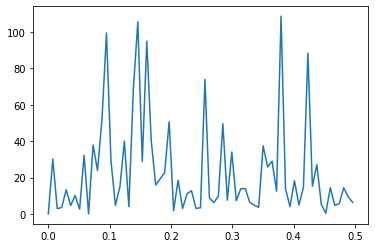

In [31]:
data = _read_data('data/webtext.train.model=.nll')

f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

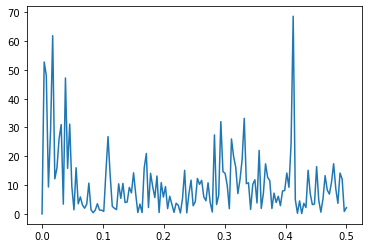

In [32]:
data = _read_data('data/webtext.train_opt.model=.nll')

f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

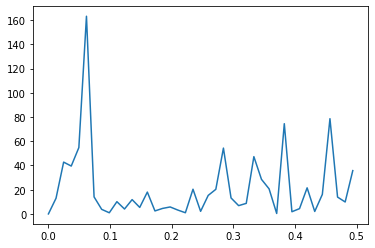

In [17]:
data = _read_data("data/webtext.valid.model=.nll")

f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

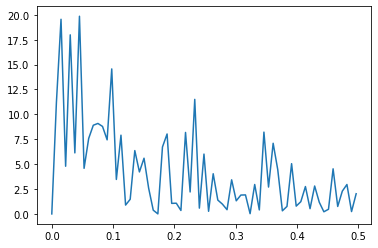

In [18]:
data = _read_data("data/webtext.test.model=.nll")

f, Pxx = signal.periodogram(data[0])
plt.plot(f, Pxx)

In [27]:
# Frequency Domain Statistics
freqs, powers = compute_freqs_powers(data)
print("first element:", "\n", freqs[0], "-->", powers[0])
print("for each element:", type(freqs[0]), "-->", type(powers[0]))
print("as a whole:", type(freqs), "-->", type(powers))
print("first row:", len(freqs[0]), "-->", len(powers[0]))
print("second row:", len(freqs[1]), "-->", len(powers[1]))
print("last row:", len(freqs[-1]), "-->", len(powers[-1]))
print("total length:", len(freqs), "-->", len(powers))

100%|██████████| 5000/5000 [00:00<00:00, 5851.79it/s]

first element: 
 [0.         0.0075188  0.01503759 0.02255639 0.03007519 0.03759398
 0.04511278 0.05263158 0.06015038 0.06766917 0.07518797 0.08270677
 0.09022556 0.09774436 0.10526316 0.11278195 0.12030075 0.12781955
 0.13533835 0.14285714 0.15037594 0.15789474 0.16541353 0.17293233
 0.18045113 0.18796992 0.19548872 0.20300752 0.21052632 0.21804511
 0.22556391 0.23308271 0.2406015  0.2481203  0.2556391  0.26315789
 0.27067669 0.27819549 0.28571429 0.29323308 0.30075188 0.30827068
 0.31578947 0.32330827 0.33082707 0.33834586 0.34586466 0.35338346
 0.36090226 0.36842105 0.37593985 0.38345865 0.39097744 0.39849624
 0.40601504 0.41353383 0.42105263 0.42857143 0.43609023 0.44360902
 0.45112782 0.45864662 0.46616541 0.47368421 0.48120301 0.4887218
 0.4962406 ] --> [2.61569669e-30 1.11876837e+01 1.95526612e+01 4.78873556e+00
 1.79885002e+01 6.13043788e+00 1.98579095e+01 4.57990527e+00
 7.58359162e+00 8.90781895e+00 9.08892383e+00 8.78906530e+00
 7.44120815e+00 1.45659225e+01 3.46348561e+00 7

In [33]:
# Use test data to visualize dataframe
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df # shape: [sum(len(row[i])), 2]

,freq,power
0,0.000000,2.615697e-30
1,0.007519,1.118768e+01
2,0.015038,1.955266e+01
3,0.022556,4.788736e+00
4,0.030075,1.798850e+01
...,...,...
1451056,0.490760,1.282665e+01
1451057,0.492813,2.191290e+01
1451058,0.494867,1.688402e+01
1451059,0.496920,1.595560e+01


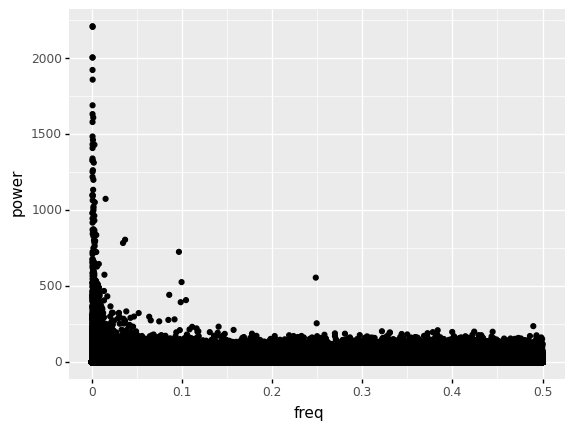

<ggplot: (8774219924944)>

In [35]:
# smoothed point diagram (test data)
(
    ggplot(df, aes(x='freq', y='power'))
    + geom_smooth() + geom_point()
)

In [37]:
# webtext-train pipeline
data = _read_data('data/webtext.train.model=.nll')
data_norm = [(np.asarray(d) - mean_webtext)/sd_webtext for d in data]
freqs, powers = compute_freqs_powers(data_norm)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/webtext_freq_power_1k_train.csv', index=False)

100%|██████████| 9310/9310 [00:01<00:00, 7694.77it/s]


In [38]:
# opt1.3b-125m pipeline
data = _read_data('data/webtext.train_opt.model=.nll')
data_norm = [(np.asarray(d) - mean_webtext)/sd_webtext for d in data]
freqs, powers = compute_freqs_powers(data_norm)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/webtext_freq_power_1k_opt.csv', index=False)

100%|██████████| 5273/5273 [00:00<00:00, 8670.44it/s]


In [39]:
# webtext-valid pipeline
data = _read_data('data/webtext.valid.model=.nll')
data_norm = [(np.asarray(d) - mean_webtext)/sd_webtext for d in data]
freqs, powers = compute_freqs_powers(data_norm)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/webtext_freq_power_1k_valid.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 7682.80it/s]


In [40]:
# webtext-test pipeline
data = _read_data('data/webtext.test.model=.nll')
data_norm = [(np.asarray(d) - mean_webtext)/sd_webtext for d in data]
freqs, powers = compute_freqs_powers(data_norm)
df = pd.DataFrame.from_dict({
    'freq': np.concatenate(freqs),
    'power': np.concatenate(powers)
})
df.to_csv('plot/webtext_freq_power_1k_test.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 7739.09it/s]


## Use fp_pipeline() to run experiments

In [4]:
# Estimated entropy in webtext.test, using 4 models: gpt2, gpt2-medium, -large, -xl
input_files = ['webtext.test.model=gpt2.nll',
               'webtext.test.model=gpt2-medium.nll',
               'webtext.test.model=gpt2-large.nll',
               'webtext.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 23126.75it/s]


In [5]:
input_files = ['small-117M.test.model=gpt2.nll',
               'small-117M.test.model=gpt2-medium.nll',
               'small-117M.test.model=gpt2-large.nll',
               'small-117M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22824.58it/s]


In [6]:
input_files = ['small-117M-k40.test.model=gpt2.nll',
               'small-117M-k40.test.model=gpt2-medium.nll',
               'small-117M-k40.test.model=gpt2-large.nll',
               'small-117M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22975.29it/s]


In [7]:
input_files = ['medium-345M.test.model=gpt2.nll',
               'medium-345M.test.model=gpt2-medium.nll',
               'medium-345M.test.model=gpt2-large.nll',
               'medium-345M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 23238.33it/s]


In [9]:
input_files = ['medium-345M-k40.test.model=gpt2.nll',
               'medium-345M-k40.test.model=gpt2-medium.nll',
               'medium-345M-k40.test.model=gpt2-large.nll',
               'medium-345M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22268.24it/s]


In [10]:
input_files = ['large-762M.test.model=gpt2.nll',
               'large-762M.test.model=gpt2-medium.nll',
               'large-762M.test.model=gpt2-large.nll',
               'large-762M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 21683.50it/s]


In [11]:
input_files = ['large-762M-k40.test.model=gpt2.nll',
               'large-762M-k40.test.model=gpt2-medium.nll',
               'large-762M-k40.test.model=gpt2-large.nll',
               'large-762M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 21524.44it/s]


In [12]:
input_files = ['xl-1542M.test.model=gpt2.nll',
               'xl-1542M.test.model=gpt2-medium.nll',
               'xl-1542M.test.model=gpt2-large.nll',
               'xl-1542M.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22636.43it/s]


In [13]:
input_files = ['xl-1542M-k40.test.model=gpt2.nll',
               'xl-1542M-k40.test.model=gpt2-medium.nll',
               'xl-1542M-k40.test.model=gpt2-large.nll',
               'xl-1542M-k40.test.model=gpt2-xl.nll']

for in_file in input_files:
    df = fp_pipeline('data/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 22583.05it/s]


In [6]:
# degen output data
input_files = [
    # 'unconditional_puresampling_large.model=gpt2.nll',
    # 'unconditional_sampling_t=0.9_large.model=gpt2.nll',
    # 'unconditional_topk_k=40_t=0.7_large.model=gpt2.nll',
    # 'unconditional_topk_k=640_large.model=gpt2.nll',
    # 'unconditional_topp_p=0.95_large.model=gpt2.nll',
    'unconditional_gold.model=gpt2.nll']

for in_file in input_files:
    df = fp_pipeline('data/data_degen/unconditional/' + in_file)
    df.to_csv('plot/' + in_file[:-4] + '.freq_power.csv', index=False)

100%|██████████| 5000/5000 [00:00<00:00, 6329.99it/s]
